In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('aus.csv')
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
df.drop(columns=['Address','Date','YearBuilt'], inplace=True)
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
df.isna().sum()


Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
df.rename(columns={
        'Lattitude': 'Latitude',
        'Longtitude': 'Longitude'
    }, inplace=True)

In [9]:
df.head(5)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Latitude,Longitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipelines
num_features = ['Rooms', 'Distance','Postcode','Bedroom2','Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Lattitude','Longtitude','Propertycount']
cat_features = ['Suburb','Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])



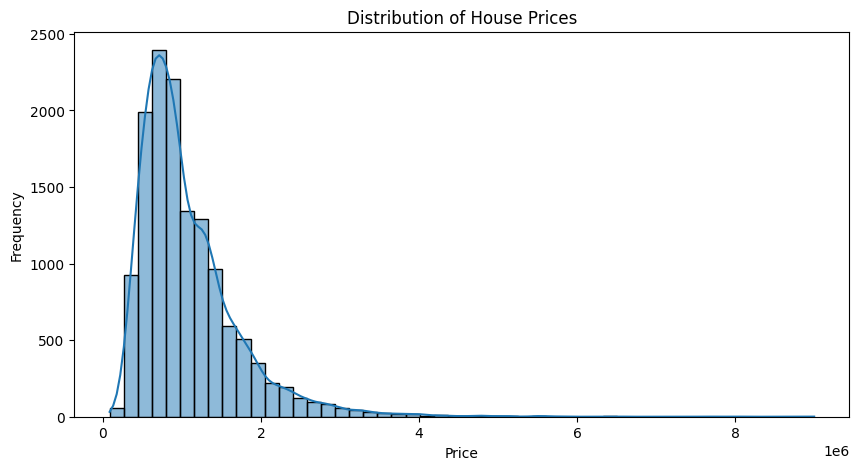

In [11]:


plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


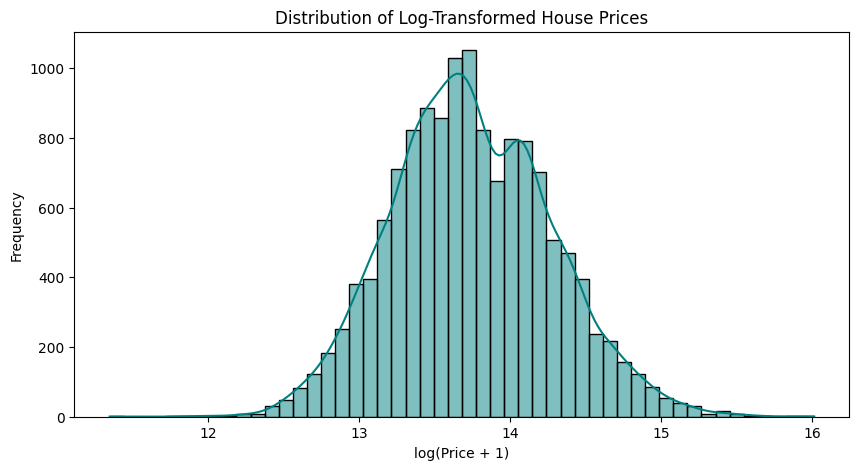

In [14]:
df['LogPrice'] = np.log1p(df['Price'])

plt.figure(figsize=(10, 5))
sns.histplot(df['LogPrice'], bins=50, kde=True, color='teal')
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

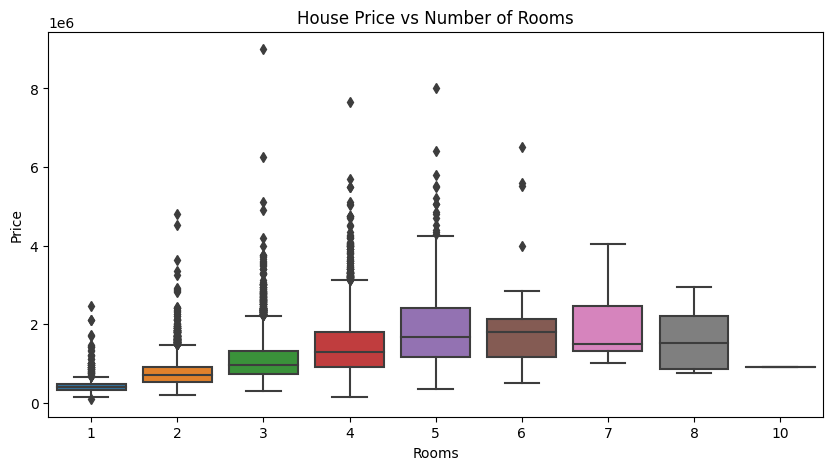

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Rooms', y='Price')
plt.title('House Price vs Number of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

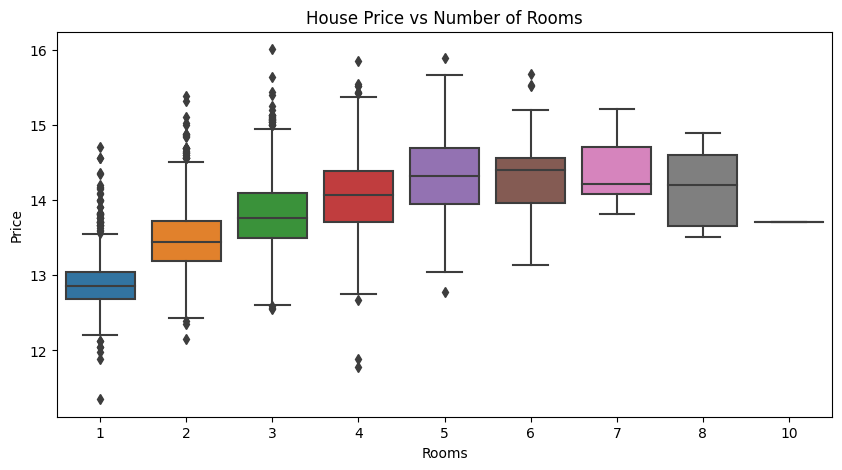

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Rooms', y='LogPrice')
plt.title('House Price vs Number of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

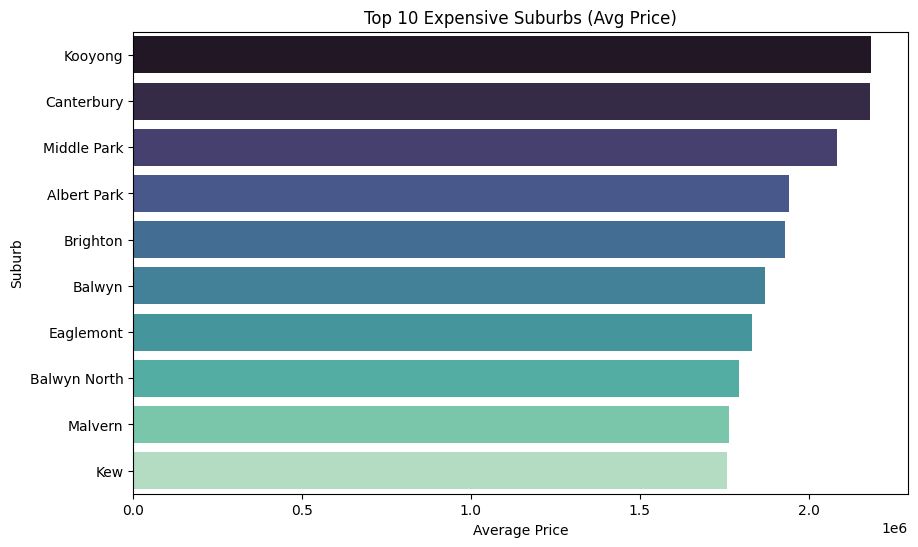

In [16]:
top_suburbs = df.groupby('Suburb')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_suburbs.values, y=top_suburbs.index, palette='mako')
plt.title('Top 10 Expensive Suburbs (Avg Price)')
plt.xlabel('Average Price')
plt.ylabel('Suburb')
plt.show()


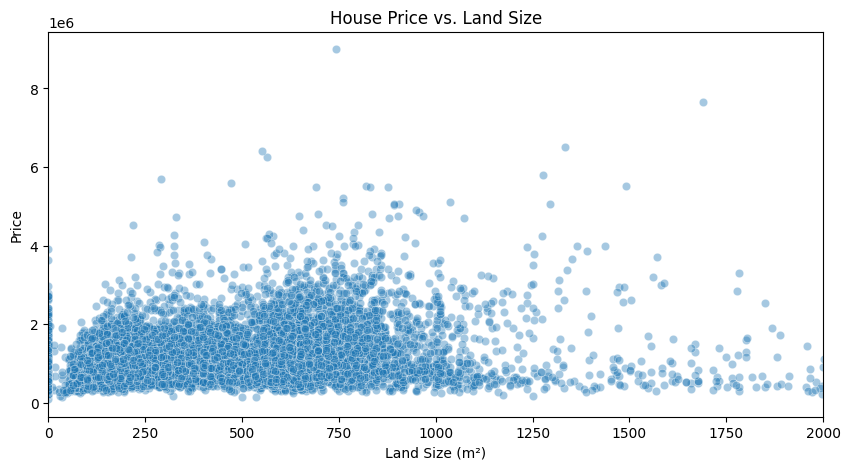

In [19]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Landsize', y='Price', alpha=0.4)
plt.title('House Price vs. Land Size')
plt.xlabel('Land Size (m²)')
plt.ylabel('Price')
plt.xlim(0, 2000)  # Optional: limit x-axis to reduce impact of extreme outliers
plt.show()

In [21]:
min_price = df['Price'].min()
max_price = df['Price'].max()
min_landsize = df['Landsize'].min()
max_landsize = df['Landsize'].max()
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Minimum Landsize: {min_landsize}")
print(f"Maximum Landsize: {max_landsize}")


Minimum Price: 85000.0
Maximum Price: 9000000.0
Minimum Landsize: 0.0
Maximum Landsize: 433014.0


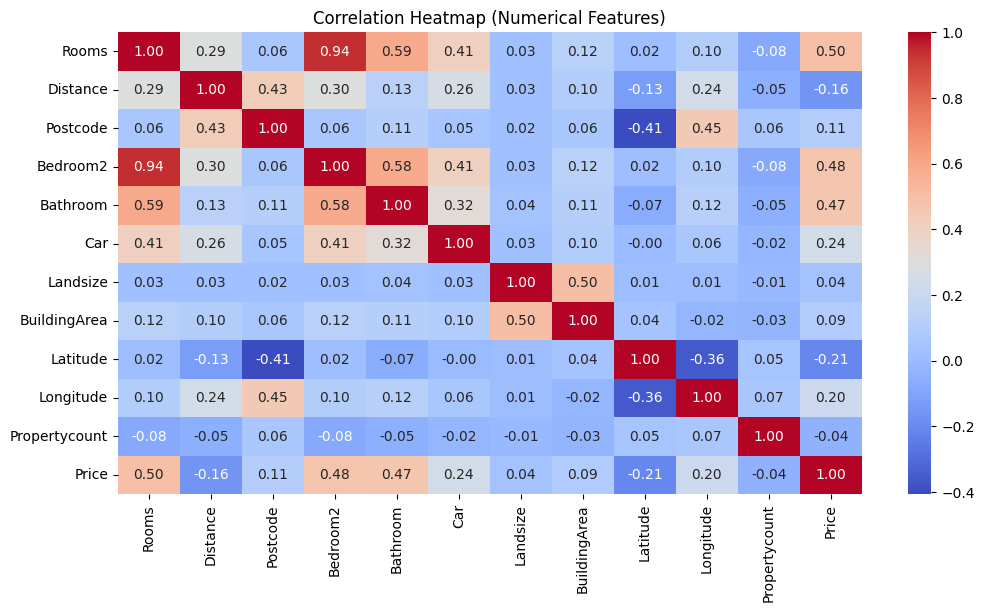

In [22]:
plt.figure(figsize=(12, 6))
corr_matrix = df[['Rooms', 'Distance','Postcode','Bedroom2','Bathroom', 'Car',
                  'Landsize', 'BuildingArea', 'Latitude','Longitude','Propertycount', 'Price']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

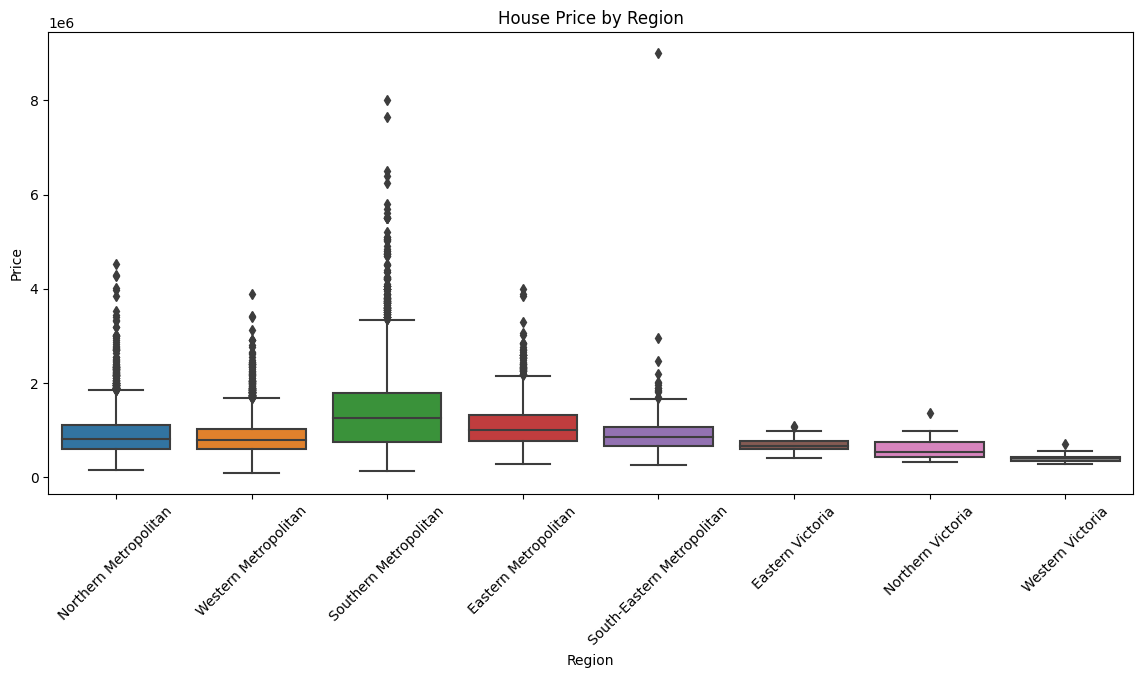

In [23]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Regionname', y='Price')
plt.title('House Price by Region')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()

In [25]:
regionname_unique = df['Regionname'].unique()
regionname_unique

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)